In [2]:
import pandas as pd
import plotly.plotly as ply
import cufflinks as cf

In [3]:
store_id_to_filtered = 1
future_date = "2018-08-06"
delivery_interval = 10
zone_id = 1

In [4]:
raw_data =  pd.read_csv('/Users/hrtku/Downloads/data_science_tasks/p1_time_series_for_stores.csv',header=0)                   
raw_data.columns = raw_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

filtered_data = raw_data[raw_data['store_id'] == store_id_to_filtered ]

filtered_data['date_of_delivery'] =  pd.to_datetime(filtered_data['date_of_delivery'], format='%Y-%m-%d')

print filtered_data.head
print filtered_data.dtypes

<bound method DataFrame.head of       store_id date_of_delivery  earliest_time  latest_time  area_id  \
0            1       2018-12-03              8           10     39.0   
1            1       2019-05-17              5            7     39.0   
2            1       2019-02-10              8           13     50.0   
3            1       2019-05-26              8           13     39.0   
4            1       2019-01-10             10           13     44.0   
5            1       2018-12-15             10           13     44.0   
6            1       2019-04-01             10           13     49.0   
7            1       2018-12-05             10           13     44.0   
8            1       2019-05-08              5            7     42.0   
9            1       2018-11-18              8           13     40.0   
10           1       2018-12-20              8           10     40.0   
11           1       2019-06-06              5            7     39.0   
12           1       2018-12-29 

In [5]:
train = filtered_data
train['store_id'] = train['store_id'].astype(float)
train['earliest_time'] = train['earliest_time'].astype(float)
train['latest_time'] = train['latest_time'].astype(float)
train['area_id'] = train['area_id'].astype(float) 
#train['total_number_of_deliveries'] = train['total_number_of_deliveries'].astype(float) 
train.rename(columns={'total_number_of_deliveries':'deliveries'}, inplace=True)
filtered_df = train[['date_of_delivery','deliveries']]
grouped_df = filtered_df.groupby(['date_of_delivery'])['deliveries'].agg('sum')
display(grouped_df)
print grouped_df.dtypes

date_of_delivery
2018-11-14    36
2018-11-15    26
2018-11-16    33
2018-11-17    24
2018-11-18    44
2018-11-19    68
2018-11-20    52
2018-11-21    55
2018-11-22    58
2018-11-23    68
2018-11-24    91
2018-11-25    90
2018-11-26    64
2018-11-27    83
2018-11-28    71
2018-11-29    63
2018-11-30    45
2018-12-01    50
2018-12-02    52
2018-12-03    56
2018-12-04    49
2018-12-05    55
2018-12-06    48
2018-12-07    54
2018-12-08    58
2018-12-09    58
2018-12-10    75
2018-12-11    64
2018-12-12    75
2018-12-13    57
              ..
2019-06-19    67
2019-06-20    63
2019-06-23    73
2019-06-24    71
2019-06-25    54
2019-06-26    84
2019-06-27    73
2019-06-28    75
2019-06-29    50
2019-06-30    49
2019-07-01    55
2019-07-02    53
2019-07-03    59
2019-07-04    57
2019-07-05    56
2019-07-06    36
2019-07-07    37
2019-07-08    57
2019-07-09    51
2019-07-10    53
2019-07-11    34
2019-07-12    61
2019-07-13    42
2019-07-14    33
2019-07-15    59
2019-07-16    45
2019-07-17    

int64


In [6]:
grouped_df.index = pd.to_datetime(grouped_df.index)
data = grouped_df

In [7]:

import plotly.plotly as ply
import cufflinks as cf

cf.go_offline()
data.iplot(title="delivery")

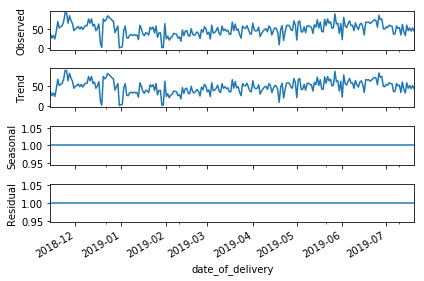

In [8]:
import plotly
import plotly.graph_objs as go
from plotly.offline import *

from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative', freq = 1)
fig = result.plot()
display(result)



In [9]:
data1 = data.to_frame()
train = data[:int(0.8*(len(data)))]
test = data [int(0.8*(len(data))):]
print(train.shape)
print(test.shape)

(194,)
(49,)


In [10]:
#from pyramid.arima import auto_arima
#import statsmodels.api as sm
#from pmdarima.arima import auto_arima
import plotly.plotly as ply
#stepwise_model = auto_arima(train, trace=True, start_p=0, start_q=0,start_P=0, start_Q=0,
#                           max_p=10, max_q=10,max_P=10,max_Q=10, m=12,
#                           seasonal=True,
#                           D=1,max_D=10, stepwise=True,
#                           error_action='ignore',  
#                           suppress_warnings=True, #
#                           approximation=False)
#print(stepwise_model.aic())

In [15]:
#stepwise_model.fit(train)


In [ ]:
#y_pred = stepwise_model.predict(n_periods=len(valid))
#from sklearn.metrics import r2_score
#acc = r2_score(valid.values, y_pred)
#print(acc)

In [18]:
import pandas as pd
import cufflinks as cf
import plotly.plotly as ply
#from pmdarima.arima import auto_arima
from pyramid.arima import auto_arima

stepwise_model = auto_arima(data, start_p=1, start_q=1,
                            max_p=5, max_q=5, m=12,
                            start_P=0, seasonal=True,
                      d=1, D=1, trace=True,
                      error_action='ignore',  
suppress_warnings=True,
stepwise=True)
stepwise_model.aic()

train = data[:int(0.8*(len(data)))]
test = data [int(0.8*(len(data))):]
results = stepwise_model.fit(train)
print(results.summary().tables[1])

future_forecast = stepwise_model.predict(n_periods=len(test))
future_forecast = pd.DataFrame(future_forecast,
index=test.index,
columns=['prediction'])
pd.concat([test, future_forecast], axis=1).iplot()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1922.523, BIC=1939.713, Fit time=0.839 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2138.349, BIC=2145.225, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2048.338, BIC=2062.090, Fit time=0.206 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1925.378, BIC=1939.130, Fit time=0.423 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1924.532, BIC=1945.160, Fit time=0.567 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2032.932, BIC=2046.684, Fit time=0.281 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1924.509, BIC=1945.137, Fit time=2.003 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1926.372, BIC=1950.438, Fit time=2.400 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1924.321, BIC=1944.950, Fit time=0.835 seconds
Fit ARIMA: order=(1, 1, 0) s